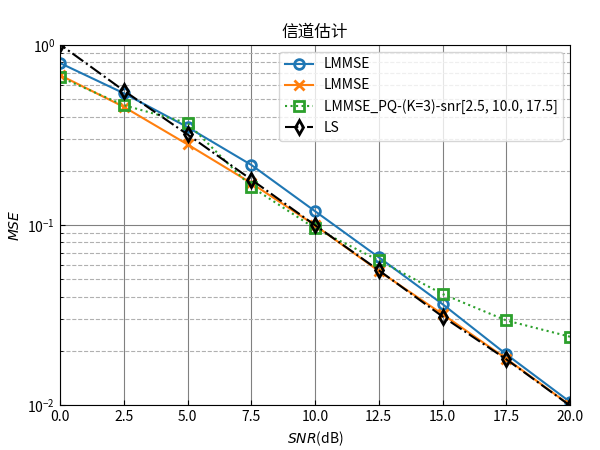

In [4]:
%matplotlib widget
import os
import re
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib.font_manager import FontProperties

# colors_ = ["r", "g", "b", "orange", "c", "m", "steelblue", "grey", "k"]
colors_ = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
markers_ = ["o", "x", "s", "d", "+", "*", "v", "^", "D"]

width = 6
height = 4.5
fig, axNMSE = plt.subplots(ncols=1, figsize=(width, height))

plt.rcParams["font.sans-serif"] = ["Source Han Sans CN"]
# axBER.set_title(r"DFT-IDFT 的信道估计误比特率")
# axBER.set_xlabel(r"$SNR$")
# axBER.set_ylabel(r"$SER$")
# axBER.set_ylim(top=.1, bottom=1e-3)
# axBER.set_yscale("log")
# axBER.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
# axBER.yaxis.set_minor_formatter(ticker.NullFormatter())
# axBER.grid(True, which="major", ls="-", color="grey")
# axBER.grid(True, which="minor", ls="--")
# axBER.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
# axBER.yaxis.set_tick_params(direction='in', which='both')
axNMSE.set_title(r"信道估计")
axNMSE.set_xlabel(r"$SNR$(dB)")
axNMSE.set_ylabel(r"$MSE$")
axNMSE.set_ylim(top=1, bottom=1e-2)
axNMSE.set_yscale("log")
axNMSE.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
axNMSE.yaxis.set_minor_formatter(ticker.NullFormatter())
axNMSE.grid(True, which="major", ls="-", color="grey")
axNMSE.grid(True, which="minor", ls="--")
axNMSE.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
axNMSE.yaxis.set_tick_params(direction='in', which='both')

# axBER.set_xlim([0, 10])
# axBER.set_xlim([-5, 2.5])
# axBER.set_xticks(np.arange(-10, 5, step=2.5))

axNMSE.set_xlim([0, 20])
# axNMSE.set_xlim([-5, 2.5])
# axNMSE.set_xticks(np.arange(-10, 5, step=2.5))

path = "./lmmse/"
files_ = os.listdir(path)
files_.sort()
colorCnt = 0
for file in files_:
    match = None
    try:
        # if match == None:
        #     match = re.match(r"\+[0-9][a-z,A-Z].*?\.csv", file)
        # if match == None:
        #     match = re.match(r"\+\+\+[0-9][a-z,A-Z].*?\.csv", file)
        if match == None:
            match = re.match(r"\+PedRight\+.*?\.csv", file)
        if match != None:

            fin = open(path + file, "r")
            lines_ = fin.readlines()

            ncentroids = int(lines_[14].split(",")[1].strip())
            method = lines_[18].split(",")[1].strip()
            curColor = colors_[colorCnt]
            curLine = "-"
            if method.startswith("LS"):
                curColor = "k"
                curLine = "-."
                # colorCnt -= 1
            if method.startswith("LMMSE_PQ"):
                curLine = ":"
                snrs = str([float(snr) for snr in lines_[17].split(",")[1:]])

                method = "LMMSE_PQ-(K=" + str(ncentroids) + ")-snr" + snrs + method[8:]
            elif method.startswith("LMMSE"):
                curLine = "-"

            snr_ = []
            ber_ = []
            rawNMSE_ = []
            for line in lines_[20:]:
                try:
                    snr_.append(float(line.split(",")[0]))
                    if float(line.split(",")[1]) == 0:
                        ber_.append(None)
                    else:
                        ber_.append(float(line.split(",")[1]))
                    rawNMSE_.append(float(line.split(",")[6]))
                except:
                    break
            # axBER.plot(snr_, ber_, label=method, color=curColor,
            #            linestyle=curLine, marker=markers_[colorCnt])
            axNMSE.plot(snr_, rawNMSE_, label=method, color=curColor,
                        linestyle=curLine, marker=markers_[colorCnt], #linewidth=1,
                        markersize=7, markerfacecolor='none', markeredgewidth=2)
            colorCnt += 1
    except Exception as e:
        print(file + ": ", e)
# axBER.legend()
axNMSE.legend()
# fig.set_size_inches(width*0.9, height*0.9)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=0, wspace=0)
plt.margins(0, 0)
axNMSE.margins(0, 0)
plt.margins(0, 0)

plt.show()

+DFT+MAD-DFT(1,8)-IDFT(2,8)-dft_main_20230508-135524.csv:  list index out of range
+DFT+Mithral-DFT(1,8)-IDFT(2,6)-dft_main_20230508-193644.csv:  list index out of range
+DFT+Mithral-IDFT(1,7)-dft_main_20230510-141507.csv:  list index out of range
+DFT+Mithral-IDFT(1,8)-dft_main_20230509-155813.csv:  list index out of range
+DFT+Mithral-IDFT(2,7)-dft_main_20230510-195641.csv:  list index out of range


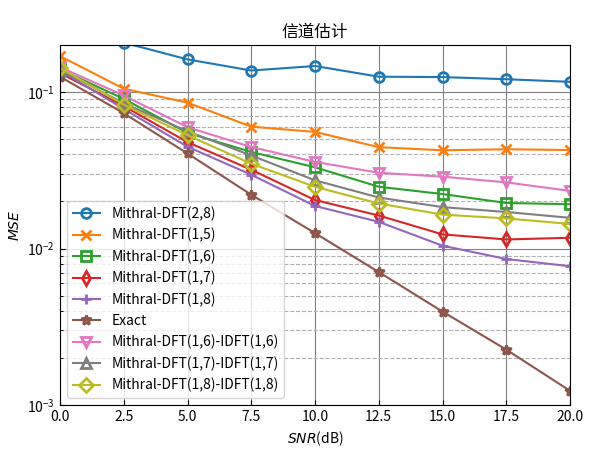

In [1]:
%matplotlib widget
import os
import re
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib.font_manager import FontProperties

# colors_ = ["r", "g", "b", "orange", "c", "m", "steelblue", "grey", "k"]
colors_ = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
markers_ = ["o", "x", "s", "d", "+", "*", "v", "^", "D"]

width = 6
height = 4.5
fig, axNMSE = plt.subplots(ncols=1, figsize=(width, height))

plt.rcParams["font.sans-serif"] = ["Source Han Sans CN"]
# axBER.set_title(r"DFT-IDFT 的信道估计误比特率")
# axBER.set_xlabel(r"$SNR$")
# axBER.set_ylabel(r"$SER$")
# axBER.set_ylim(top=.1, bottom=1e-3)
# axBER.set_yscale("log")
# axBER.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
# axBER.yaxis.set_minor_formatter(ticker.NullFormatter())
# axBER.grid(True, which="major", ls="-", color="grey")
# axBER.grid(True, which="minor", ls="--")
# axBER.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
# axBER.yaxis.set_tick_params(direction='in', which='both')
axNMSE.set_title(r"信道估计")
axNMSE.set_xlabel(r"$SNR$(dB)")
axNMSE.set_ylabel(r"$MSE$")
axNMSE.set_ylim(top=.2, bottom=1e-3)
axNMSE.set_yscale("log")
axNMSE.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
axNMSE.yaxis.set_minor_formatter(ticker.NullFormatter())
axNMSE.grid(True, which="major", ls="-", color="grey")
axNMSE.grid(True, which="minor", ls="--")
axNMSE.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
axNMSE.yaxis.set_tick_params(direction='in', which='both')

# axBER.set_xlim([0, 10])
# axBER.set_xlim([-5, 2.5])
# axBER.set_xticks(np.arange(-10, 5, step=2.5))

axNMSE.set_xlim([0, 20])
# axNMSE.set_xlim([-5, 2.5])
# axNMSE.set_xticks(np.arange(-10, 5, step=2.5))

path = "./dft/"
files_ = os.listdir(path)
files_.sort()
colorCnt = 0
for file in files_:
    match = None
    try:
        # if match == None:
        #     match = re.match(r"\+[0-9][a-z,A-Z].*?\.csv", file)
        # if match == None:
        #     match = re.match(r"\+\+\+[0-9][a-z,A-Z].*?\.csv", file)
        if match == None:
            match = re.match(r"\+DFT\+.*?\.csv", file)
        if match != None:

            fin = open(path + file, "r")
            lines_ = fin.readlines()

            ncodebooks = int(lines_[13].split(",")[1].strip())
            ncentroids = int(lines_[14].split(",")[1].strip())
            # method = lines_[18].split(",")[1].strip()
            method = lines_[18][14:].strip().strip('\"')
            curColor = colors_[colorCnt]
            curLine = "-"
            if method.startswith("LS"):
                curColor = "k"
                curLine = "-."
                # colorCnt -= 1
            if method.startswith("LMMSE_PQ"):
                curLine = ":"
                snrs = str([float(snr) for snr in lines_[17].split(",")[1:]])

                method = "LMMSE_PQ-(K=" + str(ncentroids) + ")-snr" + snrs + method[8:]
            elif method.startswith("LMMSE"):
                curLine = "-"
            # elif method.startswith("Mithral"):
            #     # curColor = cbColors_[ncodebooks]
            #     method = method + "_VQ(%d,%d)" % (256//ncodebooks, np.log2(ncentroids))


            snr_ = []
            ber_ = []
            rawNMSE_ = []
            for line in lines_[20:]:
                try:
                    snr_.append(float(line.split(",")[0]))
                    if float(line.split(",")[1]) == 0:
                        ber_.append(None)
                    else:
                        ber_.append(float(line.split(",")[1]))
                    rawNMSE_.append(float(line.split(",")[6]))
                except:
                    break
            # axBER.plot(snr_, ber_, label=method, color=curColor,
            #            linestyle=curLine, marker=markers_[colorCnt])
            axNMSE.plot(snr_, rawNMSE_, label=method, color=curColor,
                        linestyle=curLine, marker=markers_[colorCnt], #linewidth=1,
                        markersize=7, markerfacecolor='none', markeredgewidth=2)
            colorCnt += 1
    except Exception as e:
        print(file + ": ", e)
# axBER.legend()
axNMSE.legend()
# fig.set_size_inches(width*0.9, height*0.9)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=0, wspace=0)
plt.margins(0, 0)
axNMSE.margins(0, 0)
plt.margins(0, 0)

plt.show()
plt.savefig("z.svg")

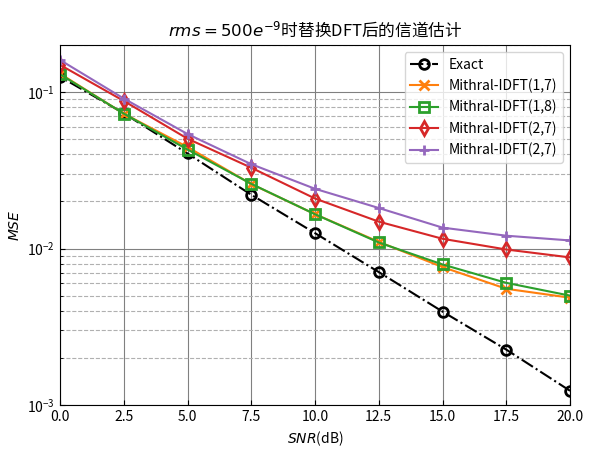

In [6]:
%matplotlib widget
import os
import re
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib.font_manager import FontProperties

# colors_ = ["r", "g", "b", "orange", "c", "m", "steelblue", "grey", "k"]
colors_ = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
markers_ = ["o", "x", "s", "d", "+", "*", "v", "^", "D"]

width = 6
height = 4.5
fig, axNMSE = plt.subplots(ncols=1, figsize=(width, height))

RMS = 500 * 1e-9

plt.rcParams["font.sans-serif"] = ["Source Han Sans CN"]
# axBER.set_title(r"DFT-IDFT 的信道估计误比特率")
# axBER.set_xlabel(r"$SNR$")
# axBER.set_ylabel(r"$SER$")
# axBER.set_ylim(top=.1, bottom=1e-3)
# axBER.set_yscale("log")
# axBER.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
# axBER.yaxis.set_minor_formatter(ticker.NullFormatter())
# axBER.grid(True, which="major", ls="-", color="grey")
# axBER.grid(True, which="minor", ls="--")
# axBER.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
# axBER.yaxis.set_tick_params(direction='in', which='both')
axNMSE.set_title(r"$rms=%.0fe^{-9}$时替换DFT后的信道估计" % (RMS*1e9))
axNMSE.set_xlabel(r"$SNR$(dB)")
axNMSE.set_ylabel(r"$MSE$")
axNMSE.set_ylim(top=.2, bottom=1e-3)
axNMSE.set_yscale("log")
axNMSE.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
axNMSE.yaxis.set_minor_formatter(ticker.NullFormatter())
axNMSE.grid(True, which="major", ls="-", color="grey")
axNMSE.grid(True, which="minor", ls="--")
axNMSE.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
axNMSE.yaxis.set_tick_params(direction='in', which='both')

# axBER.set_xlim([0, 10])
# axBER.set_xlim([-5, 2.5])
# axBER.set_xticks(np.arange(-10, 5, step=2.5))

axNMSE.set_xlim([0, 20])
# axNMSE.set_xlim([-5, 2.5])
# axNMSE.set_xticks(np.arange(-10, 5, step=2.5))

path = "./dft/"
files_ = os.listdir(path)
files_.sort()
colorCnt = 0
for file in files_:
    match = None
    try:
        # if match == None:
        #     match = re.match(r"\+[0-9][a-z,A-Z].*?\.csv", file)
        # if match == None:
        #     match = re.match(r"\+\+\+[0-9][a-z,A-Z].*?\.csv", file)
        if match == None:
            match = re.match(r"\+DFT\+.*?\.csv", file)
        if match != None:

            fin = open(path + file, "r")
            lines_ = fin.readlines()

            ncodebooks = int(lines_[13].split(",")[1].strip())
            ncentroids = int(lines_[14].split(",")[1].strip())
            # method = lines_[18].split(",")[1].strip()
            method = lines_[18][14:].strip().strip('\"')
            curColor = colors_[colorCnt]
            curLine = "-"
            rms = float(lines_[17].split(",")[1].strip())
            assert (rms - RMS) < 1e-16, "rms = %e should be %e" % (rms, RMS)
            if method.startswith("Exact"):
                curColor = "k"
                curLine = "-."
                # colorCnt -= 1
            # elif method.find("IDFT") != -1:
            elif method.find("-DFT") != -1:
                continue
                curLine = ":"
                snrs = str([float(snr) for snr in lines_[17].split(",")[1:]])

                method = "LMMSE_PQ-(K=" + str(ncentroids) + ")-snr" + snrs + method[8:]
            elif method.startswith("LMMSE"):
                curLine = "-"
            # elif method.startswith("Mithral"):
            #     # curColor = cbColors_[ncodebooks]
            #     method = method + "_VQ(%d,%d)" % (256//ncodebooks, np.log2(ncentroids))


            snr_ = []
            ber_ = []
            rawNMSE_ = []
            for line in lines_[20:]:
                try:
                    snr_.append(float(line.split(",")[0]))
                    if float(line.split(",")[1]) == 0:
                        ber_.append(None)
                    else:
                        ber_.append(float(line.split(",")[1]))
                    rawNMSE_.append(float(line.split(",")[6]))
                except:
                    break
            # axBER.plot(snr_, ber_, label=method, color=curColor,
            #            linestyle=curLine, marker=markers_[colorCnt])
            axNMSE.plot(snr_, rawNMSE_, label=method, color=curColor,
                        linestyle=curLine, marker=markers_[colorCnt], #linewidth=1,
                        markersize=7, markerfacecolor='none', markeredgewidth=2)
            colorCnt += 1
    except Exception as e:
        print(file + ": ", e)
# axBER.legend()
axNMSE.legend()
# fig.set_size_inches(width*0.9, height*0.9)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=0, wspace=0)
plt.margins(0, 0)
axNMSE.margins(0, 0)
plt.margins(0, 0)

plt.show()
plt.savefig("z.svg")

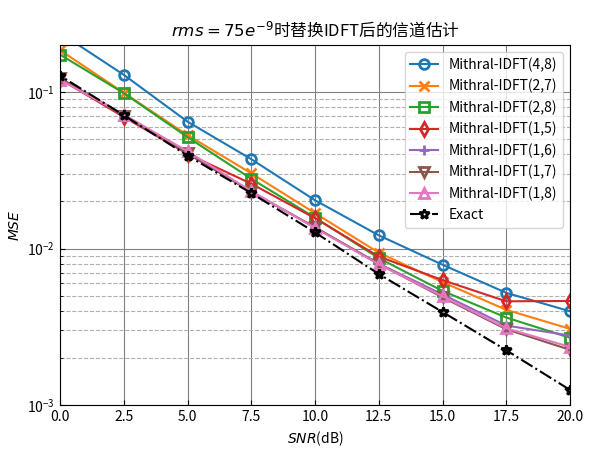

In [52]:
%matplotlib widget
import os
import re
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib.font_manager import FontProperties

# colors_ = ["r", "g", "b", "orange", "c", "m", "steelblue", "grey", "k"]
colors_ = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
markers_ = ["o", "x", "s", "d", "+", "v", "^", "D", "*"]

width = 6
height = 4.5
fig, axNMSE = plt.subplots(ncols=1, figsize=(width, height))

RMS = 75 * 1e-9
mode = "IDFT"

plt.rcParams["font.sans-serif"] = ["Source Han Sans CN"]
# axBER.set_title(r"DFT-IDFT 的信道估计误比特率")
# axBER.set_xlabel(r"$SNR$")
# axBER.set_ylabel(r"$SER$")
# axBER.set_ylim(top=.1, bottom=1e-3)
# axBER.set_yscale("log")
# axBER.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
# axBER.yaxis.set_minor_formatter(ticker.NullFormatter())
# axBER.grid(True, which="major", ls="-", color="grey")
# axBER.grid(True, which="minor", ls="--")
# axBER.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
# axBER.yaxis.set_tick_params(direction='in', which='both')
axNMSE.set_title(r"$rms=%.0fe^{-9}$时替换%s后的信道估计" % (RMS*1e9,mode))
axNMSE.set_xlabel(r"$SNR$(dB)")
axNMSE.set_ylabel(r"$MSE$")
axNMSE.set_ylim(top=.2, bottom=1e-3)
axNMSE.set_yscale("log")
axNMSE.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='all', numticks=10))
axNMSE.yaxis.set_minor_formatter(ticker.NullFormatter())
axNMSE.grid(True, which="major", ls="-", color="grey")
axNMSE.grid(True, which="minor", ls="--")
axNMSE.xaxis.set_tick_params(direction='in', which='both')  # 刻度线向内
axNMSE.yaxis.set_tick_params(direction='in', which='both')

# axBER.set_xlim([0, 10])
# axBER.set_xlim([-5, 2.5])
# axBER.set_xticks(np.arange(-10, 5, step=2.5))

axNMSE.set_xlim([0, 20])
# axNMSE.set_xlim([-5, 2.5])
# axNMSE.set_xticks(np.arange(-10, 5, step=2.5))

path = "./dft/"
files_ = os.listdir(path)
files_.sort()
colorCnt = 0
for file in files_:
    match = None
    try:
        # if match == None:
        #     match = re.match(r"\+[0-9][a-z,A-Z].*?\.csv", file)
        # if match == None:
        #     match = re.match(r"\+\+\+[0-9][a-z,A-Z].*?\.csv", file)
        if match == None:
            if abs(RMS - 75*1e-9) < 1e-16:
                match = re.match(r"\+DFT75\+.*?\.csv", file)
            if abs(RMS - 500*1e-9) < 1e-16:
                match = re.match(r"\+DFT\+.*?\.csv", file)

        if match != None:

            fin = open(path + file, "r")
            lines_ = fin.readlines()

            ncodebooks = int(lines_[13].split(",")[1].strip())
            ncentroids = int(lines_[14].split(",")[1].strip())
            # method = lines_[18].split(",")[1].strip()
            method = lines_[18][14:].strip().strip('\"')
            curColor = colors_[colorCnt]
            curLine = "-"
            curMark = markers_[colorCnt]
            rms = float(lines_[17].split(",")[1].strip())
            assert abs(rms - RMS) < 1e-16, "rms = %e should be %e" % (rms, RMS)
            if method.startswith("Exact"):
                curColor = "k"
                curLine = "-."
                colorCnt -= 1
                curMark = "*"
            else:
                if mode == "IDFT":
                    if method.find("-DFT") != -1:
                        continue
                elif mode == "DFT":
                    if method.find("-IDFT") != -1:
                        continue
                # curLine = ":"
                # snrs = str([float(snr) for snr in lines_[17].split(",")[1:]])

                # method = "LMMSE_PQ-(K=" + str(ncentroids) + ")-snr" + snrs + method[8:]
            # elif method.startswith("LMMSE"):
            #     curLine = "-"
            # elif method.startswith("Mithral"):
            #     # curColor = cbColors_[ncodebooks]
            #     method = method + "_VQ(%d,%d)" % (256//ncodebooks, np.log2(ncentroids))


            snr_ = []
            ber_ = []
            rawNMSE_ = []
            for line in lines_[20:]:
                try:
                    snr_.append(float(line.split(",")[0]))
                    if float(line.split(",")[1]) == 0:
                        ber_.append(None)
                    else:
                        ber_.append(float(line.split(",")[1]))
                    rawNMSE_.append(float(line.split(",")[6]))
                except:
                    break
            # axBER.plot(snr_, ber_, label=method, color=curColor,
            #            linestyle=curLine, marker=markers_[colorCnt])
            axNMSE.plot(snr_, rawNMSE_, label=method, color=curColor,
                        linestyle=curLine, marker=curMark, #linewidth=1,
                        markersize=7, markerfacecolor='none', markeredgewidth=2)
            colorCnt += 1
    except Exception as e:
        print(file + ": ", e)
# axBER.legend()
axNMSE.legend()
# fig.set_size_inches(width*0.9, height*0.9)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=0, wspace=0)
plt.margins(0, 0)
axNMSE.margins(0, 0)
plt.margins(0, 0)

plt.show()
plt.savefig("z.svg")